In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [417]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [418]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [419]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [420]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [421]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [422]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [423]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [ 0.89250716 -0.23478311 -0.80608007  0.83857172 -0.74021151  0.37766237
  0.53319702  0.12687716]


#### Parameter optimization

In [424]:

cost_history = []
def logistic_gradient_descent(X, Y, lr,beta):
    for i in range(n_iter):
        """
        Z = beta.T.X = beta0 + beta1.x1
        Y_hat = sigmoid(Z)
        """
        z = X.dot(beta)
        y_hat = sigmoid(z)

        gradient = compute_gradients(X, Y, y_hat)

        beta = beta - lr * gradient

        cost = compute_cost(y_hat, Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")
    return beta

In [425]:
beta = logistic_gradient_descent(X, Y, lr,beta)

Iteration : 0: Beta : [ 0.88756517 -0.23549884 -0.80431491  0.83978361 -0.73962422  0.37713194
  0.53257761  0.12733507] :Cost : 1.0660
Iteration : 100: Beta : [ 0.43482768 -0.29666005 -0.63972296  0.9427205  -0.68445909  0.33133297
  0.47003329  0.16494587] :Cost : 0.8076
Iteration : 200: Beta : [ 0.06000796 -0.33880919 -0.50181172  1.01559766 -0.63692809  0.29800278
  0.41083109  0.18796117] :Cost : 0.6325
Iteration : 300: Beta : [-0.24815225 -0.36646462 -0.38947238  1.06933966 -0.59690707  0.27305391
  0.35858711  0.20105083] :Cost : 0.5154
Iteration : 400: Beta : [-0.50251278 -0.38429562 -0.29840811  1.11305258 -0.5634329   0.25274295
  0.31405576  0.20858399] :Cost : 0.4361
Iteration : 500: Beta : [-0.71438703 -0.39577666 -0.22415606  1.15241921 -0.53536645  0.23474241
  0.2766976   0.21331068] :Cost : 0.3812
Iteration : 600: Beta : [-0.89287771 -0.40321463 -0.16297747  1.19044078 -0.51171367  0.2179036
  0.24553179  0.21672528] :Cost : 0.3421
Iteration : 700: Beta : [-1.04507274 

#### Cost Visualization

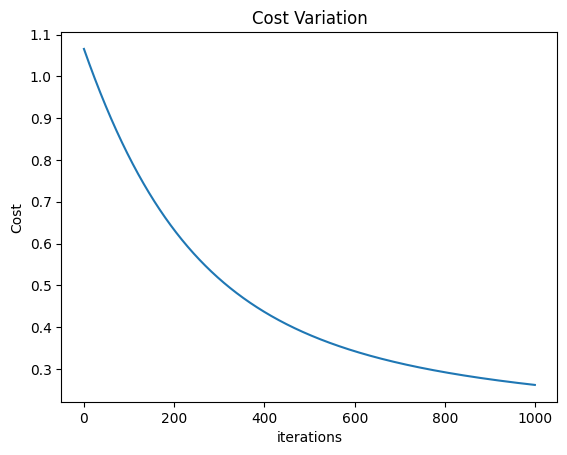

In [426]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Predict Probability

In [427]:
def predict_proba(X, beta):
    z = X.dot(beta)
    Y_proba = sigmoid(z)
    return Y_proba

In [428]:
Y_proba = predict_proba(X, beta)
Y_proba

array([0.17095887, 0.64469709, 0.2341224 , 0.0477162 , 0.32134424,
       0.83087541, 0.08916662, 0.34887362, 0.06296166, 0.11333777,
       0.24872427, 0.10823023, 0.1210099 , 0.0776486 , 0.26060539,
       0.0299587 , 0.90848412, 0.04741586, 0.10279132, 0.41991548,
       0.30303562, 0.08488578, 0.05055465, 0.56036956, 0.69162409,
       0.05643787, 0.1067676 , 0.07626092, 0.10014012, 0.02592478,
       0.60750184, 0.05133666, 0.01211755, 0.37585963, 0.39580306,
       0.27871509, 0.02892693, 0.08173179, 0.05142515, 0.3698382 ,
       0.2634496 , 0.3140136 , 0.22469133, 0.48674657, 0.16367647,
       0.32144239, 0.18909585, 0.07521559, 0.21599207, 0.10243653,
       0.43404747, 0.06486886, 0.33282802, 0.73788522, 0.34529167,
       0.88337053, 0.53682624, 0.17827196, 0.3630851 , 0.62968794,
       0.04989016, 0.10218046, 0.11314505, 0.49106977, 0.11916787,
       0.1496218 , 0.32527525, 0.12940033, 0.70684283, 0.06157593,
       0.0139329 , 0.25567546])

####  Binary class predictions

In [429]:
def predict_class(X, beta, threshold):
    z = X.dot(beta)
    Y_predicted = sigmoid(z)
    return Y_predicted >= threshold

In [430]:
predict_class(X,beta,0.5)

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False])